In [61]:
import pandas as pd
import numpy as np

In [62]:
df = pd.read_csv('clean-data/clean_data.csv')
df = df[['TotalEmployees', 'TotalEmployeesIndia', 'Rating', 'CompanyType', 'Name', 'CompanyReviewsLive',
         'CompanySalaries', 'InterviewExperiencesLive', 'Age', 'HQCountry', 'Headquarters', 'CompanyJobsLive', 'LocationCount', 'Industry']]
df.head()


,TotalEmployees,TotalEmployeesIndia,Rating,CompanyType,Name,CompanyReviewsLive,CompanySalaries,InterviewExperiencesLive,Age,HQCountry,Headquarters,CompanyJobsLive,LocationCount,Industry
0,100001.0,100001.0,1,Public,Tata Consultancy Services,41589,394003,2783,54,India,Mumbai,55,240,"BPO / Call Centre,IT Services & Consulting"
1,100001.0,100001.0,2,Public,Accenture,27770,268685,2177,33,Ireland,Dublin,7294,132,"IT Services & Consulting,Software Product"
2,100001.0,100001.0,1,Private,Cognizant,25176,272214,1748,28,United States (USA),Teaneck,316,88,IT Services & Consulting
3,100001.0,100001.0,2,Public,ICICI Bank,32063,100049,940,28,India,Mumbai,150,995,"Financial Services,Banking"
4,100001.0,100001.0,1,Public,Wipro,23674,200635,1819,77,India,Bangalore/Bengaluru,520,254,IT Services & Consulting


In [63]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df['CompanyType'] = le.fit_transform(df['CompanyType'])
# df['Name'] = le.fit_transform(df['Name'])
# df['HQCountry'] = le.fit_transform(df['HQCountry'])
# df['Headquarters'] = le.fit_transform(df['Headquarters'])
# df['Industry'] = le.fit_transform(df['Industry'])
# df.info()

In [64]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

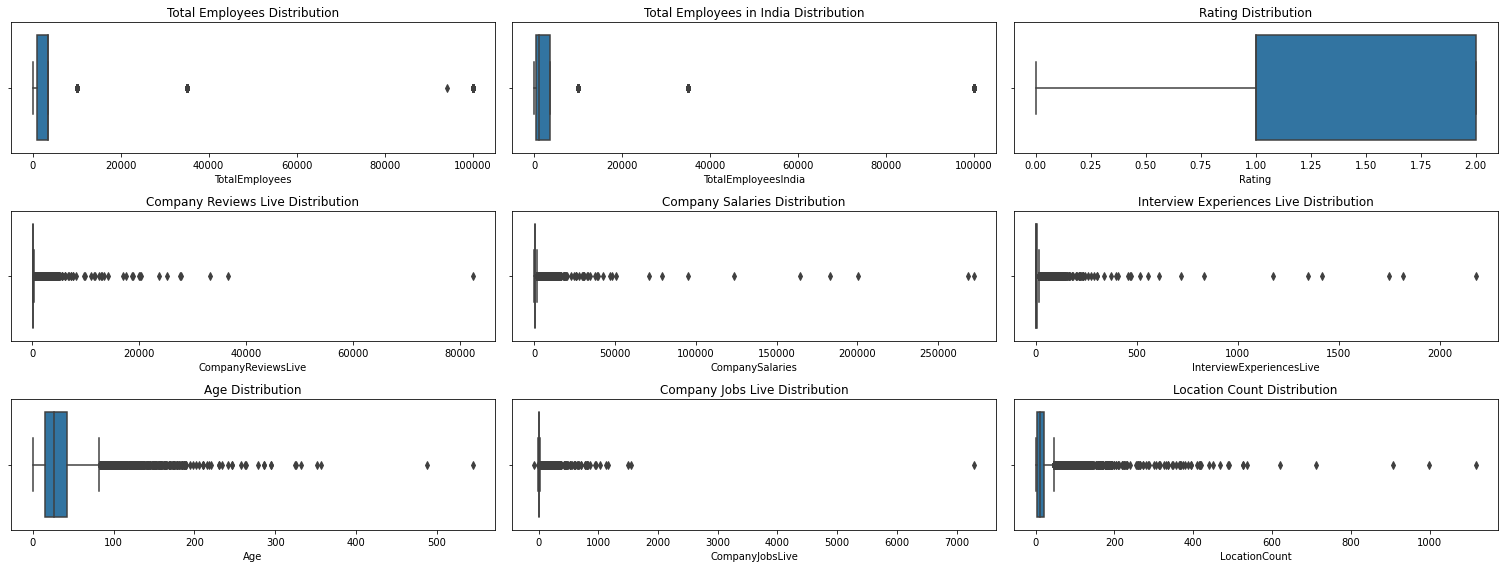

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(3, 3, figsize=(21,8))

ax1 = plt.subplot(3, 3, 1)
ax1 = sns.boxplot(data=df_train, x='TotalEmployees')
ax1.set_title("Total Employees Distribution")

ax2 = plt.subplot(3, 3, 2)
ax2 = sns.boxplot(data=df_train, x='TotalEmployeesIndia')
ax2.set_title("Total Employees in India Distribution")

ax3 = plt.subplot(3, 3, 3)
ax3 = sns.boxplot(data=df_train, x='Rating')
ax3.set_title("Rating Distribution")

ax4 = plt.subplot(3, 3, 4)
ax4 = sns.boxplot(data=df_train, x='CompanyReviewsLive')
ax4.set_title("Company Reviews Live Distribution")

ax5 = plt.subplot(3, 3, 5)
ax5 = sns.boxplot(data=df_train, x='CompanySalaries')
ax5.set_title("Company Salaries Distribution")

ax6 = plt.subplot(3, 3, 6)
ax6 = sns.boxplot(data=df_train, x='InterviewExperiencesLive')
ax6.set_title("Interview Experiences Live Distribution")

ax7 = plt.subplot(3, 3, 7)
ax7 = sns.boxplot(data=df_train, x='Age')
ax7.set_title("Age Distribution")

ax8 = plt.subplot(3, 3, 8)
ax8 = sns.boxplot(data=df_train, x='CompanyJobsLive')
ax8.set_title("Company Jobs Live Distribution")

ax9 = plt.subplot(3, 3, 9)
ax9 = sns.boxplot(data=df_train, x='LocationCount')
ax9.set_title("Location Count Distribution")

plt.tight_layout()

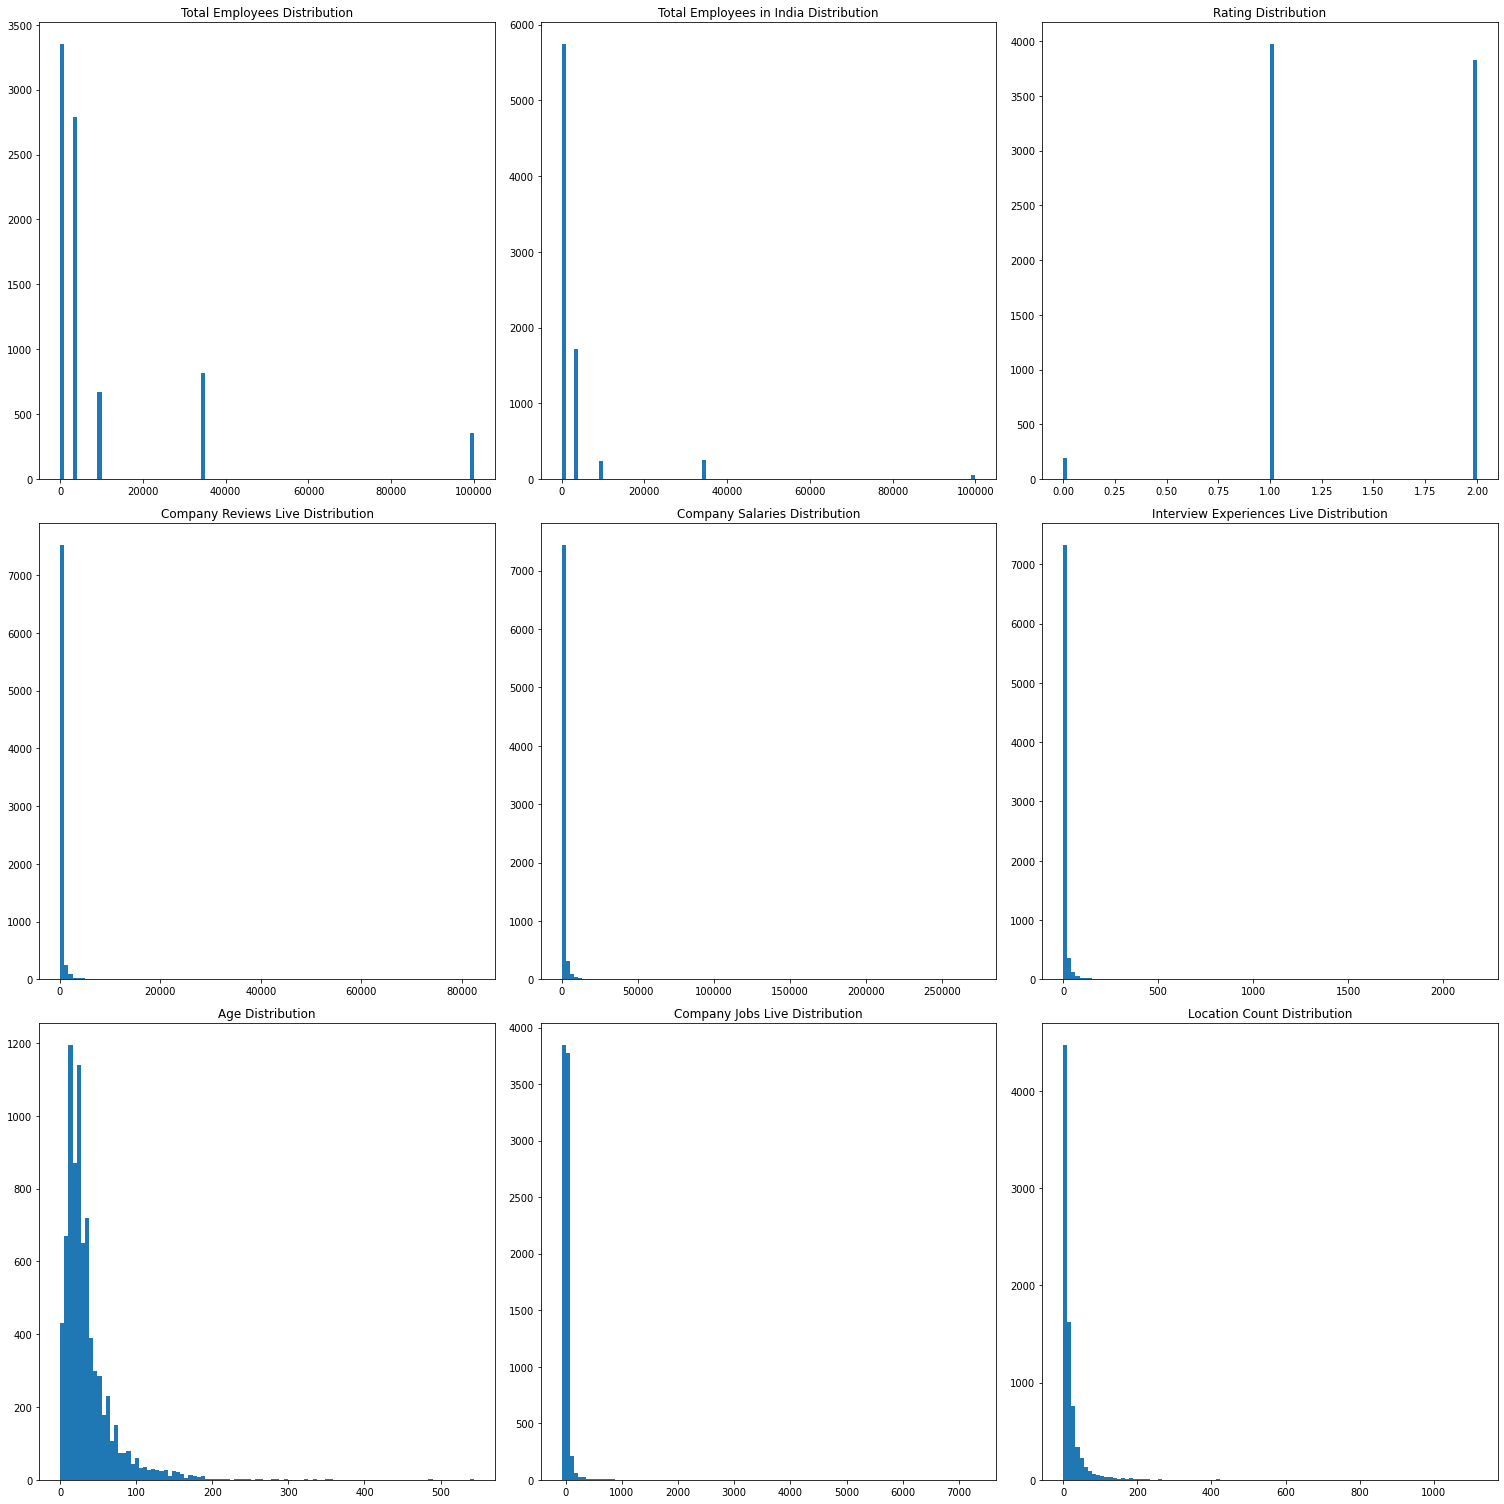

In [66]:
fig, ax = plt.subplots(3, 3, figsize=(21,21))

ax1 = plt.subplot(3, 3, 1)
ax1.hist(df_train['TotalEmployees'], bins=100)
ax1.set_title("Total Employees Distribution")

ax2 = plt.subplot(3, 3, 2)
ax2.hist(df_train['TotalEmployeesIndia'], bins=100)
ax2.set_title("Total Employees in India Distribution")

ax3 = plt.subplot(3, 3, 3)
ax3.hist(df_train['Rating'], bins=100)
ax3.set_title("Rating Distribution")

ax4 = plt.subplot(3, 3, 4)
ax4.hist(df_train['CompanyReviewsLive'], bins=100)
ax4.set_title("Company Reviews Live Distribution")

ax5 = plt.subplot(3, 3, 5)
ax5.hist(df_train['CompanySalaries'], bins=100)
ax5.set_title("Company Salaries Distribution")

ax6 = plt.subplot(3, 3, 6)
ax6.hist(df_train['InterviewExperiencesLive'], bins=100)
ax6.set_title("Interview Experiences Live Distribution")

ax7 = plt.subplot(3, 3, 7)
ax7.hist(df_train['Age'], bins=100)
ax7.set_title("Age Distribution")

ax8 = plt.subplot(3, 3, 8)
ax8.hist(df_train['CompanyJobsLive'], bins=100)
ax8.set_title("Company Jobs Live Distribution")

ax9 = plt.subplot(3, 3, 9)
ax9.hist(df_train['LocationCount'], bins=100)
ax9.set_title("Location Count Distribution")

plt.tight_layout()

In [67]:
import numpy as np

def outliers_iqr(column):
  quantile_1, quantitle_3 = np.percentile(df_train[column], [25, 75])
  iqr = quantitle_3 - quantile_1
  lower_bound = quantile_1 - (iqr * 1.5)
  upper_bound = quantitle_3 + (iqr * 1.5)

  df_train[column] = df_train[column].clip(lower_bound, upper_bound)

  return df_train[column]

df_train.TotalEmployees = outliers_iqr('TotalEmployees')
df_train.TotalEmployeesIndia = outliers_iqr('TotalEmployeesIndia')
df_train.CompanyReviewsLive = outliers_iqr('CompanyReviewsLive')
df_train.CompanySalaries = outliers_iqr('CompanySalaries')
df_train.InterviewExperiencesLive = outliers_iqr('InterviewExperiencesLive')
df_train.Age = outliers_iqr('Age')
df_train.CompanyJobsLive = outliers_iqr('CompanyJobsLive')
df_train.LocationCount = outliers_iqr('LocationCount')

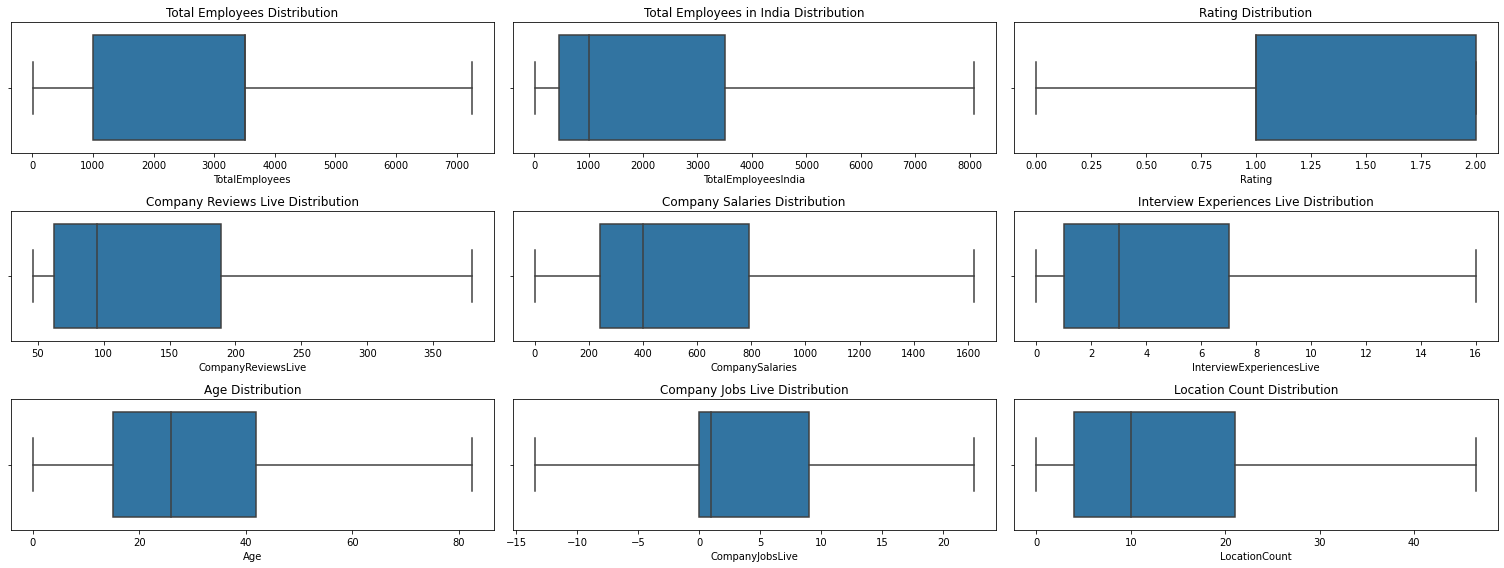

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(3, 3, figsize=(21,8))

ax1 = plt.subplot(3, 3, 1)
ax1 = sns.boxplot(data=df_train, x='TotalEmployees')
ax1.set_title("Total Employees Distribution")

ax2 = plt.subplot(3, 3, 2)
ax2 = sns.boxplot(data=df_train, x='TotalEmployeesIndia')
ax2.set_title("Total Employees in India Distribution")

ax3 = plt.subplot(3, 3, 3)
ax3 = sns.boxplot(data=df_train, x='Rating')
ax3.set_title("Rating Distribution")

ax4 = plt.subplot(3, 3, 4)
ax4 = sns.boxplot(data=df_train, x='CompanyReviewsLive')
ax4.set_title("Company Reviews Live Distribution")

ax5 = plt.subplot(3, 3, 5)
ax5 = sns.boxplot(data=df_train, x='CompanySalaries')
ax5.set_title("Company Salaries Distribution")

ax6 = plt.subplot(3, 3, 6)
ax6 = sns.boxplot(data=df_train, x='InterviewExperiencesLive')
ax6.set_title("Interview Experiences Live Distribution")

ax7 = plt.subplot(3, 3, 7)
ax7 = sns.boxplot(data=df_train, x='Age')
ax7.set_title("Age Distribution")

ax8 = plt.subplot(3, 3, 8)
ax8 = sns.boxplot(data=df_train, x='CompanyJobsLive')
ax8.set_title("Company Jobs Live Distribution")

ax9 = plt.subplot(3, 3, 9)
ax9 = sns.boxplot(data=df_train, x='LocationCount')
ax9.set_title("Location Count Distribution")

plt.tight_layout()

In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

vars_normalizing = ['TotalEmployees', 'TotalEmployeesIndia', 'Rating', 'CompanyReviewsLive',
                    'CompanySalaries', 'InterviewExperiencesLive', 'Age', 'CompanyJobsLive', 'LocationCount']

df_train[vars_normalizing] = scaler.fit_transform(df_train[vars_normalizing])
df_test[vars_normalizing] = scaler.transform(df_test[vars_normalizing])


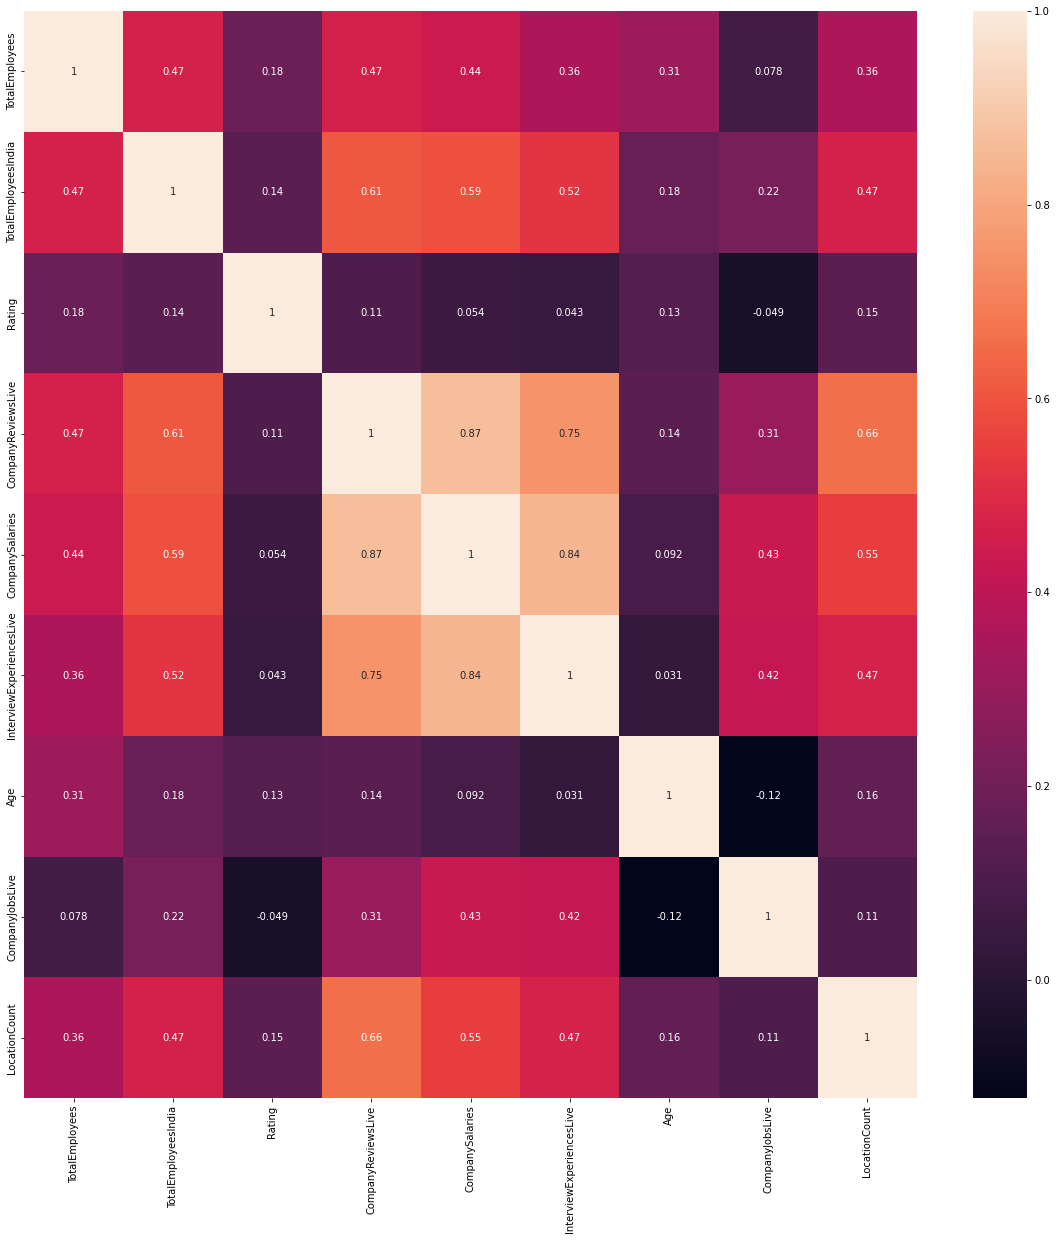

In [70]:
corr = df_train.corr()
fig = plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, data=df_train)
plt.show()